# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='/Users/ssatpati/0-DATASCIENCE/DEV/github/ml/datasets/mnist')
X, Y = mnist.data, mnist.target

#np.set_printoptions(linewidth=np.inf)
#print(X[Y == 6][:1].reshape(28,28))

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

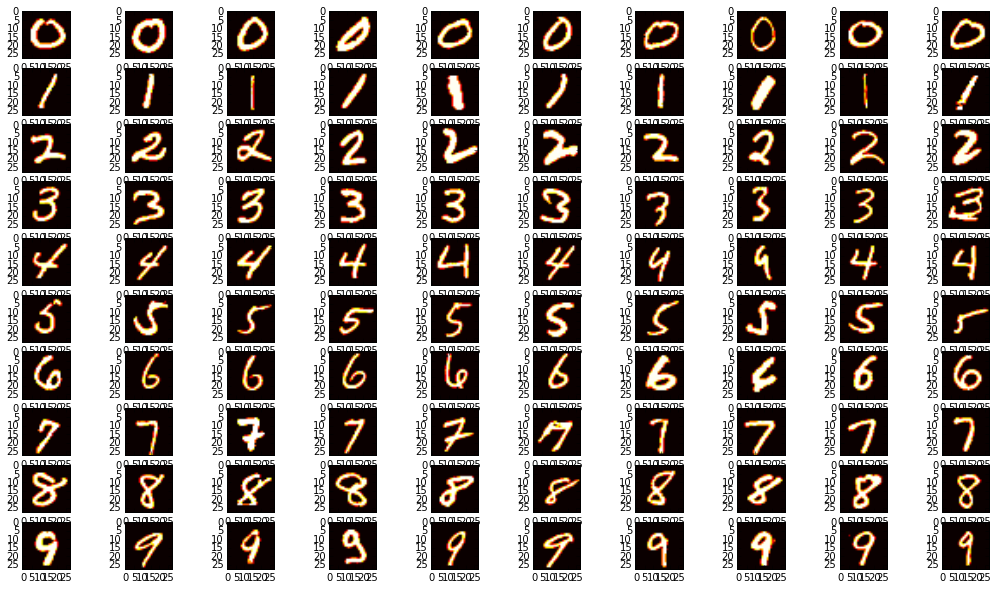

In [3]:
def P1(num_examples=10):

### STUDENT START ###
    plt.figure(figsize=(18, 10), dpi=80)
    num_labels = len(np.unique(train_labels))
    cnt = 1
    for l in np.unique(train_labels):
        for e in xrange(num_examples):
            #Sub plot grid - no of unique lables X no of examples
            plt.subplot(num_labels, num_examples, cnt)
            imgplot = plt.imshow(train_data[train_labels == l][e].reshape(28,28))
            imgplot.set_cmap('hot')
            cnt += 1
### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
def P2(k_values):

### STUDENT START ###
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(mini_train_data, mini_train_labels)
        dev_predicted = knn.predict(dev_data)
        if k == 1:
            print "Classification Report (k=1)"
            print classification_report(dev_labels, dev_predicted)
        accuracy = knn.score(dev_data, dev_labels)
        print "K: {0} Accuracy: {1}".format(k, accuracy)
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Classification Report (k=1)
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

K: 1 Accuracy: 0.888
K: 3 Accuracy: 0.878
K: 5 Accuracy: 0.869
K: 7 Accuracy: 0.865
K: 9 Accuracy: 0.863


ANSWER: The most difficult digit is 3

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    for s in train_sizes:
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(train_data[:s], train_labels[:s])
        
        start = time.time()
        accuracy = knn.score(dev_data, dev_labels)
        accuracies.append(accuracy)
        end = time.time()
        print "Size: {0} Accuracy: {1} Time(s): {2}".format(s, accuracy, (end - start))
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Size: 100 Accuracy: 0.72 Time(s): 0.104841947556
Size: 200 Accuracy: 0.786 Time(s): 0.202425003052
Size: 400 Accuracy: 0.841 Time(s): 0.396816015244
Size: 800 Accuracy: 0.884 Time(s): 0.818424940109
Size: 1600 Accuracy: 0.902 Time(s): 1.69748187065
Size: 3200 Accuracy: 0.926 Time(s): 3.39914894104
Size: 6400 Accuracy: 0.937 Time(s): 6.87343096733
Size: 12800 Accuracy: 0.959 Time(s): 16.7297420502
Size: 25000 Accuracy: 0.97 Time(s): 33.2760820389


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

[100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
[0.71999999999999997, 0.78600000000000003, 0.84099999999999997, 0.88400000000000001, 0.90200000000000002, 0.92600000000000005, 0.93700000000000006, 0.95899999999999996, 0.96999999999999997]
('Intercept: \n', 0.84315597722583713)
('Coefficients: \n', array([  6.66527139e-06]))
Accuracy for n=60000 before transformation is 1.24307226036
('Intercept: \n', 0.56881456093587168)
('Coefficients: \n', array([ 0.02929882]))
Accuracy for n=60000 after log transformation is 1.03386513757


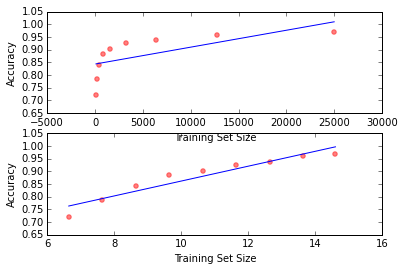

In [6]:
def P4():

### STUDENT START ###
    print train_sizes
    print accuracies
    regr = LinearRegression()
    X = np.asarray(train_sizes)
    #print X.shape, X.ndim
    Y = np.asarray(accuracies)
    #print Y.shape, Y.ndim
    #print((X[:,np.newaxis]))
    
    # Run Linear Regression (converting X to an nx1 array since this requires X to be a 2 dim array)
    regr.fit(X[:,np.newaxis],Y)
    # The intercept & coefficients
    print('Intercept: \n', regr.intercept_)
    print('Coefficients: \n', regr.coef_)
    
    #Scatter Plot of Size/Accuracy (Non Linear Relationship)
    plt.subplot(2, 1, 1)
    plt.scatter(X, Y, alpha=0.5, color='red')
    plt.plot(X, regr.predict(X[:,np.newaxis]), color='blue')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    
    # Prediction for n=60000
    X1 = np.asarray([60000])
    print("Accuracy for n=60000 before transformation is {0}".format(regr.predict(X1)))
    
    # Applying log transformation
    Xt = np.log2(X)
    regr.fit(Xt[:,np.newaxis],Y)
    # The intercept & coefficients
    print('Intercept: \n', regr.intercept_)
    print('Coefficients: \n', regr.coef_)
    
    #Scatter Plot of Size/Accuracy after log transformation (Shows a much better Linear Relationship)
    plt.subplot(2, 1, 2)
    plt.scatter(Xt, Y, alpha=0.5, color='red')
    plt.plot(Xt, regr.predict(Xt[:,np.newaxis]), color='blue')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    
    # Prediction for n=60000
    X1 = np.log2(X1)
    print("Accuracy for n=60000 after log transformation is {0}".format(regr.predict(X1)))

### STUDENT END ###

P4()

ANSWER: The training set size & accuracy doesn't have a linear relationsip. A log (Base 2) transformation is performed on the training set size to make the relationship linear - as evident from the scatter plots above.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 99   0   0   0   0   0   0   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  1   0  98   2   0   0   0   1   0   0]
 [  0   0   0  83   0   1   0   0   1   1]
 [  0   0   0   0 102   0   0   0   0   2]
 [  1   0   0   0   0  88   0   0   1   1]
 [  1   0   0   0   1   0  96   0   0   0]
 [  0   0   1   0   0   0   0 111   0   1]
 [  1   0   1   2   0   2   1   0  89   0]
 [  0   0   0   0   0   0   0   0   0 106]]


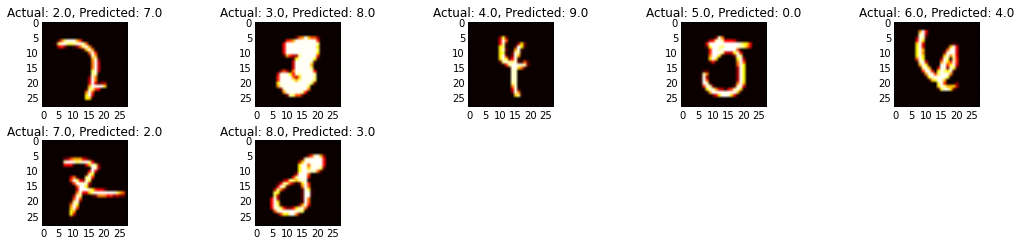

In [7]:
def P5():

### STUDENT START ###
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(train_data, train_labels)
    dev_pred = knn.predict(dev_data)
    print(confusion_matrix(dev_labels, dev_pred))
    
    plt.figure(figsize=(18,10), dpi=80)
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    
    # Print one mistake from each class
    cnt = 1
    for i in xrange(10):
        for j in xrange(len(dev_data)):
            if dev_labels[j] == i and dev_labels[j] != dev_pred[j]:
                plt.subplot(5, 5, cnt)
                plt.title("Actual: {0}, Predicted: {1}".format(dev_labels[j], dev_pred[j]))
                imgplot = plt.imshow(dev_data[j].reshape(28,28))
                imgplot.set_cmap('hot')
                cnt += 1
                break;
        
### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [8]:
def P6():
    
### STUDENT START ###
    # Doing this on entire training data is memory intensive
    #train_data_1 = np.copy(train_data)
    # Running this on mini train data instead
    train_data_1 = np.copy(mini_train_data)
    dev_data_1 = np.copy(dev_data)
    
    l,w = dev_data_1.shape
    n = 28
    print (l,w)
    start = time.time()
    for i in xrange(l):
        dev_data_rs = dev_data_1[i].reshape(n, n)
        for j in xrange(w):
            cnt = 0
            sum = 0
            r, c = divmod(j, n)
            for i1 in xrange(r-1,r+2):
                for j1 in xrange(c-1,c+2):
                    if (i1 >=0 and i1 < n) and (j1 >=0 and j1 < n):
                        cnt += 1
                        sum += dev_data_rs[i1][j1]
            # Compute the Average
            dev_data_1[i][j] = (sum * 1.0) / cnt

            end = time.time()
    print "Time(s) taken for Smoothing Dev Data: {0}".format(end - start)


    l,w = train_data_1.shape
    n = 28
    print (l,w)
    start = time.time()
    for i in xrange(l):
        train_data_rs = train_data_1[i].reshape(n, n)
        for j in xrange(w):
            cnt = 0
            sum = 0
            r, c = divmod(j, n)
            for i1 in xrange(r-1,r+2):
                for j1 in xrange(c-1,c+2):
                    if (i1 >=0 and i1 < n) and (j1 >=0 and j1 < n):
                        cnt += 1
                        sum += train_data_rs[i1][j1]
            # Compute the Average
            train_data_1[i][j] = (sum * 1.0) / cnt

            end = time.time()
    print "Time(s) taken for Smoothing Training Data: {0}".format(end - start)

    knn = KNeighborsClassifier(n_neighbors=1)
    start = time.time()
    knn.fit(train_data_1, mini_train_labels)
    print "Accuracy [Smoothed Training Data / Dev Data] - {0}".format(knn.score(dev_data, dev_labels))
    print "Accuracy [Smoothed Training Data / Smoothed Dev Data] - {0}".format(knn.score(dev_data_1, dev_labels))
    end = time.time()
    print "Time(s) NN: {0}".format(end - start)
    
    start = time.time()
    knn.fit(mini_train_data, mini_train_labels)
    print "Accuracy [Training Data / Smoothed Dev Data] - {0}".format(knn.score(dev_data_1, dev_labels))
    end = time.time()
    print "Time(s) NN: {0}".format(end - start)
    
    del train_data_1
    del dev_data_1

### STUDENT END ###

P6()

(1000, 784)
Time(s) taken for Smoothing Dev Data: 6.52004003525
(1000, 784)
Time(s) taken for Smoothing Training Data: 6.61167001724
Accuracy [Smoothed Training Data / Dev Data] - 0.896
Accuracy [Smoothed Training Data / Smoothed Dev Data] - 0.902
Time(s) NN: 3.33198094368
Accuracy [Training Data / Smoothed Dev Data] - 0.86
Time(s) NN: 1.62740778923


ANSWER: Accuracy is highest @ 90% when Smoothing both Training & Dev Data.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [9]:
def P7():

### STUDENT START ###   
    train_data_2 = np.where(train_data > 0, 1, 0)
    dev_data_2 = np.where(dev_data > 0, 1, 0)
    
    gnb = BernoulliNB()
    gnb.fit(train_data_2, train_labels)
    # make predictions
    print "Accuracy (BernoulliNB) - {0}".format(gnb.score(dev_data_2, dev_labels))
    
    train_data_3 = np.where(train_data < 0.25, 0, np.where(train_data < 0.75, 1, 2))
    dev_data_3 = np.where(dev_data < 0.25, 0, np.where(dev_data < 0.75, 1, 2))
    
    mnb = MultinomialNB()
    mnb.fit(train_data_3, train_labels)
    # make predictions
    print "Accuracy (MultinomialNB) - {0}".format(gnb.score(dev_data_3, dev_labels))
    
### STUDENT END ###

P7()

Accuracy (BernoulliNB) - 0.827
Accuracy (MultinomialNB) - 0.805


ANSWER: In the case of Multinomial, a pixel is treated as White, Grey, or Black. This information is not very helpful in classifying the digit and hence Multinomial Naive Bayes performs worse than a Gaussian Naive Bayes which treats pixel as White or Black.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [10]:
def P8(alphas):

### STUDENT START ###
    train_data_2 = np.where(train_data > 0, 1, 0)
    dev_data_2 = np.where(dev_data > 0, 1, 0)
    
    parameters = [alphas]
    gscv = GridSearchCV(BernoulliNB(), parameters)
    gscv.fit(train_data_2, train_labels)
    print "@@Grid Scores@@\n {0}".format(gscv.grid_scores_)
    print "@@Best Score@@\n {0}".format(gscv.best_score_)
    print "@@Best Estimator@@\n {0}".format(gscv.best_estimator_)
    return gscv

### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

@@Grid Scores@@
 [mean: 0.09892, std: 0.00002, params: {'alpha': 0.0}, mean: 0.83327, std: 0.00258, params: {'alpha': 0.0001}, mean: 0.83317, std: 0.00254, params: {'alpha': 0.001}, mean: 0.83298, std: 0.00258, params: {'alpha': 0.01}, mean: 0.83267, std: 0.00253, params: {'alpha': 0.1}, mean: 0.83203, std: 0.00258, params: {'alpha': 0.5}, mean: 0.83190, std: 0.00249, params: {'alpha': 1.0}, mean: 0.83110, std: 0.00281, params: {'alpha': 2.0}, mean: 0.82837, std: 0.00254, params: {'alpha': 10.0}]
@@Best Score@@
 0.833266666667
@@Best Estimator@@
 BernoulliNB(alpha=0.0001, binarize=0.0, class_prior=None, fit_prior=True)


/Users/ssatpati/anaconda/lib/python2.7/site-packages/sklearn/naive_bayes.py:534: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)


In [11]:
print nb.best_params_

{'alpha': 0.0001}


ANSWER: Best Value for Alpha is 0.0001 when the accuracy is 0.833266666667. When Alpha is zero, Accuracy is 0.09892.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [12]:
def P9():

### STUDENT END ###
    gnb = GaussianNB()
    gnb.fit(train_data, train_labels)
    # make predictions
    print "Accuracy (GaussianNB) - {0}".format(gnb.score(dev_data, dev_labels))
    print np.mean(gnb.theta_)
    print np.mean(gnb.sigma_)
        
    # Adding Gaussian Noise (Making the distribution more normal)
    mu, sigma = 0.13, 0.05 # mean and standard deviation
    train_data_3 = np.copy(train_data) + np.random.normal(mu, sigma, (len(train_data), 784))
    dev_data_3 = np.copy(dev_data) + np.random.normal(mu, sigma, (len(dev_data), 784))
    
    #print train_data[:1]
    #print train_data_3[:1]
        
    gnb.fit(train_data_3, train_labels)
    # make predictions
    print "Accuracy (GaussianNB) / After Pre-Processing - {0}".format(gnb.score(dev_data_3, dev_labels))
    

### STUDENT END ###

gnb = P9()

Accuracy (GaussianNB) - 0.577
0.131711496012
0.0536606661299
Accuracy (GaussianNB) / After Pre-Processing - 0.813


# ANSWER: Adding a Gaussian Noise helps smooth out the distribution, increasing the accuracy to as high as 81.5% - around the same rate as BernoulliNB.

Accuracy (GaussianNB) / Before Pre-Processing - 0.577
Accuracy (GaussianNB) / After Pre-Processing - 0.803

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

Accuracy (BernoulliNB) - 0.827


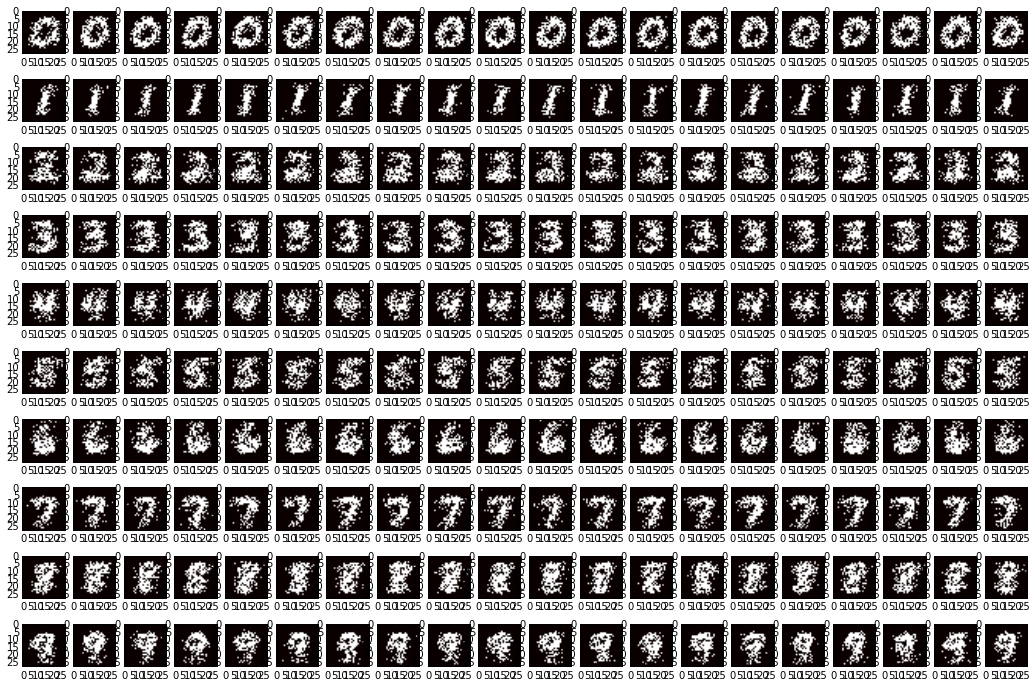

In [13]:
def P10(num_examples):

### STUDENT START ###
    train_data_2 = np.where(train_data > 0, 1, 0)
    dev_data_2 = np.where(dev_data > 0, 1, 0)
    
    gnb = BernoulliNB()
    gnb.fit(train_data_2, train_labels)
    # make predictions
    print "Accuracy (BernoulliNB) - {0}".format(gnb.score(dev_data_2, dev_labels))
    
    plt.figure(figsize=(18, 12))
    # Random number between 0 & 1
    rand = np.random.rand()
    
    num_labels = len(np.unique(train_labels))
    cnt = 1
    for l in xrange(num_labels):
        for e in xrange(num_examples):
            # Create an array of 0s & 1s of size 784
            rand_pixes = np.random.rand(784)
            # Covert log prob to prob
            p_pred = np.exp(gnb.feature_log_prob_[l])
            # Turn Pixel on where prob > random number brtween 0 & 1
            g_pred = np.where(p_pred > rand_pixes, 1, 0)
            
            plt.subplot(num_labels, num_examples, cnt)
            imgplot = plt.imshow(g_pred.reshape(28,28))
            imgplot.set_cmap('hot')
            
            cnt += 1


### STUDENT END ###

P10(20)

ANSWER: The generated digits appear blurred out compared to the original ones.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

(1000,)
(1000,)


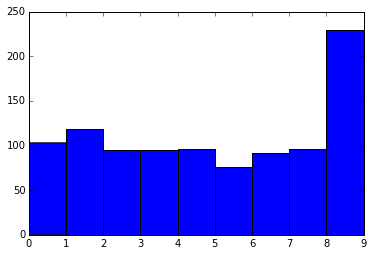

[0, 42, 69, 53, 53, 49, 52, 53, 629]
[0, 11, 33, 29, 35, 26, 41, 44, 608]
p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  42    accuracy = 0.262
p(pred) <= 0.9990000000000    total =  69    accuracy = 0.478
p(pred) <= 0.9999900000000    total =  53    accuracy = 0.547
p(pred) <= 0.9999999000000    total =  53    accuracy = 0.660
p(pred) <= 0.9999999990000    total =  49    accuracy = 0.531
p(pred) <= 0.9999999999900    total =  52    accuracy = 0.788
p(pred) <= 0.9999999999999    total =  53    accuracy = 0.830
p(pred) <= 1.0000000000000    total = 629    accuracy = 0.967


In [14]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    train_data_2 = np.where(train_data > 0, 1, 0)
    dev_data_2 = np.where(dev_data > 0, 1, 0)
    
    gnb = BernoulliNB(alpha=0.00001)
    gnb.fit(train_data_2, train_labels)
    
    # make predictions    
    np.set_printoptions(linewidth=np.inf)
    max_prob = np.amax(gnb.predict_proba(dev_data_2), axis=1)
    print max_prob.shape
    
    #pred_labels = gnb.predict(dev_data_2)
    pred_labels = gnb.predict_proba(dev_data_2).argmax(axis=1)
    print pred_labels.shape
    
    # Create a histogram
    plt.hist(pred_labels, bins=[i for i in xrange(10)])
    plt.show()
    
    for i in xrange(len(pred_labels)):
        mp = max_prob[i]
        if mp <= 0.5:
            total[0] += 1
            if pred_labels[i] == dev_labels[i]:
                correct[0] += 1
        elif 0.5 < mp <= 0.9:
            total[1] += 1
            if pred_labels[i] == dev_labels[i]:
                correct[1] += 1
        elif 0.9 < mp <= 0.999:
            total[2] += 1
            if pred_labels[i] == dev_labels[i]:
                correct[2] += 1
        elif 0.999 < mp <= 0.99999:
            total[3] += 1
            if pred_labels[i] == dev_labels[i]:
                correct[3] += 1
        elif 0.99999 < mp <= 0.9999999:
            total[4] += 1
            if pred_labels[i] == dev_labels[i]:
                correct[4] += 1
        elif 0.9999999 < mp <= 0.999999999:
            total[5] += 1
            if pred_labels[i] == dev_labels[i]:
                correct[5] += 1
        elif 0.999999999 < mp <= 0.99999999999:
            total[6] += 1
            if pred_labels[i] == dev_labels[i]:
                correct[6] += 1
        elif 0.99999999999 < mp <= 0.9999999999999:
            total[7] += 1
            if pred_labels[i] == dev_labels[i]:
                correct[7] += 1
        elif 0.9999999999999 < mp <= 1.0:
            total[8] += 1
            if pred_labels[i] == dev_labels[i]:
                correct[8] += 1
        else:
            pass
        
    print total
    print correct
        

                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = (correct[i] * 1.0) / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

ANSWER: This is a weakly calibrated classifier since accuracy is as low as 47.8% when the posterior probability of the predicted class is in between .900 & 0.999. As the posterior probability increases and gets closer to 1, the accuracy increases to 96.7%.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [15]:
def P12():

### STUDENT START ###
    train_data_2 = np.where(train_data > 0.1, 1, 0)
    dev_data_2 = np.where(dev_data > 0.1, 1, 0)
    
    gnb = BernoulliNB(alpha=0.00001)
    gnb.fit(train_data_2, train_labels)
    
    # make predictions
    print "Before: Shape - {0}".format(train_data_2.shape)
    print "Before: Accuracy (BernoulliNB) - {0}".format(gnb.score(dev_data_2, dev_labels))
    
    
    # Features Added:
    # Row & Col Sum
    # How many rows and cols have non zero values
    # Accuracy Achieved - 84.8%
    

    # Add ROW & COL SUM to the numpy array
    train_data_2_1 = np.empty([len(train_data_2), 843])
    # Add row/col sum
    for i in xrange(len(train_data_2)):
        cs = np.sum(train_data_2[i].reshape(28,28), axis=0)
        rs = np.sum(train_data_2[i].reshape(28,28), axis=1)
        row = np.append(train_data_2[i], cs)
        row = np.append(row, rs)
        x = train_data_2[i].reshape(28,28)
        row = np.append(row, np.array([len(x[x.any(axis=1)]), len(x[x.any(axis=0)])]))
        row = np.append(row, np.array([x[x != 0].sum()]))
        train_data_2_1[i] = row
        
    dev_data_2_1 = np.empty([len(dev_data_2), 843])
    # Add row/col sum
    for i in xrange(len(dev_data_2)):
        cs = np.sum(dev_data_2[i].reshape(28,28), axis=0)
        rs = np.sum(dev_data_2[i].reshape(28,28), axis=1)
        row = np.append(dev_data_2[i], cs)
        row = np.append(row, rs)
        x = dev_data_2[i].reshape(28,28)
        row = np.append(row, np.array([len(x[x.any(axis=1)]), len(x[x.any(axis=0)])]))
        row = np.append(row, np.array([x[x != 0].sum()]))
        dev_data_2_1[i] = row 
    
    print "After: Shape (Train Data) - {0}".format(train_data_2_1.shape)
    print "After: Shape (Dev Data) - {0}".format(dev_data_2_1.shape)
    
    gnb.fit(train_data_2_1, train_labels)
    print "After: Accuracy (BernoulliNB) - {0}".format(gnb.score(dev_data_2_1, dev_labels))    

### STUDENT END ###

P12()

Before: Shape - (60000, 784)
Before: Accuracy (BernoulliNB) - 0.837
After: Shape (Train Data) - (60000, 843)
After: Shape (Dev Data) - (1000, 843)
After: Accuracy (BernoulliNB) - 0.848
